<a href="https://colab.research.google.com/github/napsternxg/ipython-notebooks/blob/master/System_Identification_DMD_Control_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# System Identification: DMD Control Example

Source: https://www.youtube.com/watch?v=tuPRiA5kk3w

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0.9, 0], [0, 1.1]])
B = np.array([[0], [1.]])
K = np.array([[0, 0.3]])
A, B, K

(array([[0.9, 0. ],
        [0. , 1.1]]), array([[0.],
        [1.]]), array([[0. , 0.3]]))

In [3]:
CL = A - B@K
CL

array([[0.9, 0. ],
       [0. , 0.8]])

In [4]:
x = np.array([[10], [10]])
x.shape

(2, 1)

In [5]:
A@x-B@K@x

array([[9.],
       [8.]])

In [6]:
X = []
U = []
x = np.array([[10], [10]])
for i in range(10):
  X.append(x)
  u = -K@x + np.random.randn()
  U.append(u)
  x = A@x+B@u
X.append(x)

X = np.hstack(X)
U = np.hstack(U)
X.shape, U.shape, x.shape, u.shape

((2, 11), (1, 10), (2, 1), (1, 1))

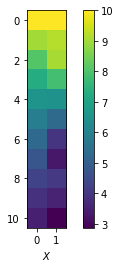

In [7]:
plt.imshow(X.T)
plt.xlabel("$X$")
plt.colorbar()

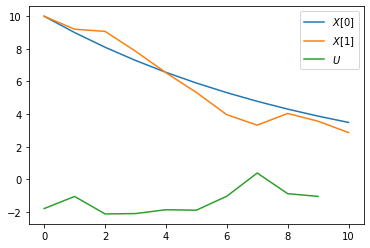

In [8]:
plt.plot(X[0], label="$X[0]$")
plt.plot(X[1], label="$X[1]$")
plt.plot(U[0], label="$U$")
plt.legend()

In [9]:
X1 = X[:, :-1]
X2 = X[:, 1:]

In [10]:
# Naive DMD
Anaive = X2@np.linalg.pinv(X1)
Anaive

array([[9.00000000e-01, 1.99665317e-16],
       [1.78001441e-01, 7.11400863e-01]])

In [11]:
# Correct DMD
Upsilon = U
Acorrect = (X2 - B@Upsilon)@np.linalg.pinv(X1)
Acorrect

array([[ 9.00000000e-01,  1.99665317e-16],
       [-1.25647527e-15,  1.10000000e+00]])

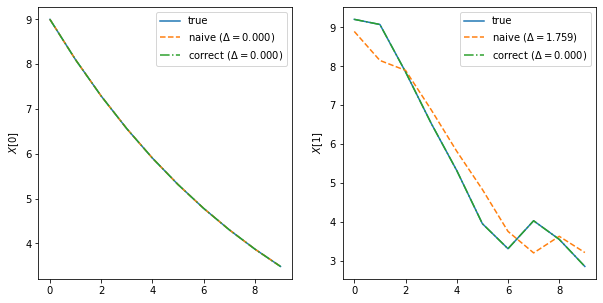

In [12]:
X2_naive = Anaive@X1
X2_correct = Acorrect@X1 + B@Upsilon
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(X.shape[0]):
  ax[i].plot(X2[i], linestyle="-", label="true")
  dist = np.linalg.norm(X2_naive[i] - X2[i])
  ax[i].plot(X2_naive[i], linestyle="--", label=f"naive ($\Delta={dist:.3f}$)")
  dist = np.linalg.norm(X2_correct[i] - X2[i])
  ax[i].plot(X2_correct[i], linestyle="-.", label=f"correct ($\Delta={dist:.3f}$)")
  ax[i].legend()
  ax[i].set_ylabel(f"$X[{i}]$")